# importing data for processing

In [1]:
import pandas as pd


In [2]:
data = pd.read_csv('salary.csv')

In [3]:
data.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Label encoding categorical columns to visualize correlation for feature selection (Note: since the data is nominal and not ordinal, we will use one-hot encoding in our actual model training)

In [4]:
from sklearn.preprocessing import LabelEncoder

corr = data

LE=LabelEncoder()

corr = corr.apply(LE.fit_transform)

sel = corr.drop('salary', axis=1)

sel.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,22,7,2671,9,12,4,1,1,4,1,25,0,39,39
1,33,6,2926,9,12,2,4,0,4,1,0,0,12,39
2,21,4,14086,11,8,0,6,1,4,1,0,0,39,39
3,36,4,15336,1,6,2,6,0,2,1,0,0,39,39
4,11,4,19355,9,12,2,10,5,2,0,0,0,39,5


# IGNORE! Failed experiment - Feature engineering through column multiplication (more notes in readme.txt)

In [5]:
result = pd.DataFrame()

for col in sel.columns:
    
    # Multiply the current column with all other columns
    multiplied = sel[col].values[:, None] * sel.values
    # Create a DataFrame from the multiplied values
    multiplied_df = pd.DataFrame(multiplied, columns=[f'{col}_x_{other_col}' for other_col in sel.columns])
    # Concatenate the multiplied DataFrame with the result
    result = pd.concat([result, multiplied_df], axis=1)


correlations = result.corrwith(corr['salary'])

# Sort the correlations in descending order to get the highest correlations
sorted_correlations = correlations.abs().sort_values(ascending=False)

# Select the top N columns with the highest correlation (e.g., top 5)
top_columns = sorted_correlations.index[:30]

# Display the selected columns
print(top_columns)


Index(['hours-per-week_x_education-num', 'education-num_x_hours-per-week',
       'age_x_education-num', 'education-num_x_age',
       'education-num_x_education-num', 'capital-gain_x_capital-gain',
       'education-num_x_capital-gain', 'capital-gain_x_education-num',
       'sex_x_education-num', 'education-num_x_sex',
       'capital-gain_x_hours-per-week', 'hours-per-week_x_capital-gain',
       'capital-gain_x_race', 'race_x_capital-gain',
       'native-country_x_capital-gain', 'capital-gain_x_native-country',
       'capital-gain_x_education', 'education_x_capital-gain',
       'capital-gain_x_workclass', 'workclass_x_capital-gain',
       'capital-gain_x_age', 'age_x_capital-gain', 'capital-gain_x_sex',
       'sex_x_capital-gain', 'age_x_hours-per-week', 'hours-per-week_x_age',
       'age_x_sex', 'sex_x_age', 'race_x_education-num',
       'education-num_x_race'],
      dtype='object')


## Generating correlation matrix for feature selection

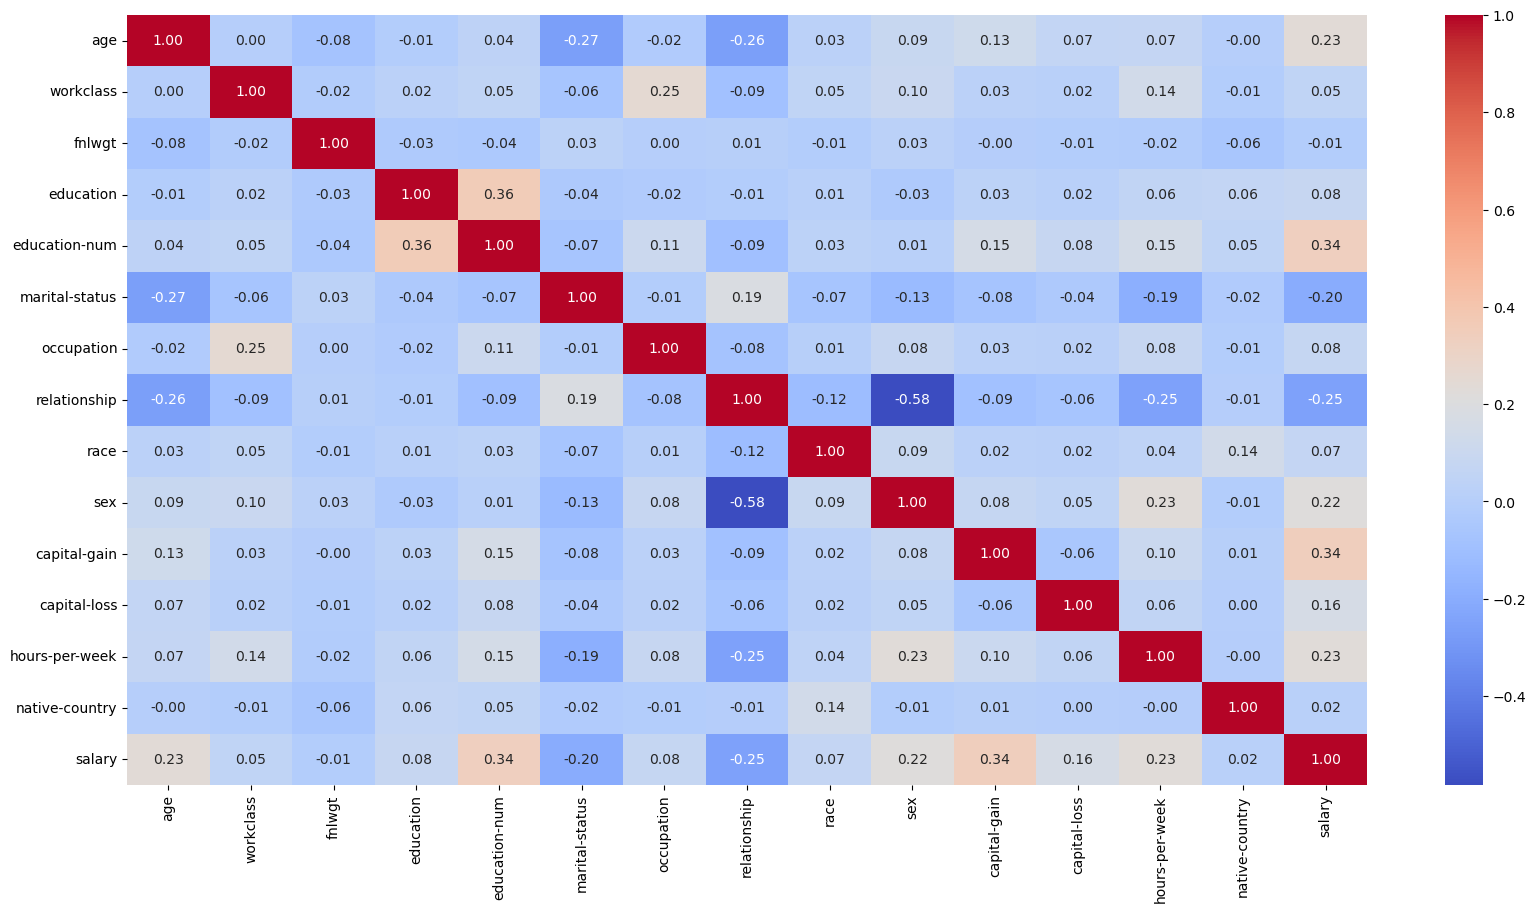

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_mat = corr.corr()

plt.figure(figsize=(20,10))

sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f")

plt.show()

# Feature selection based on correlation



In [7]:
final = data[['age', 'education-num', 'marital-status', 'occupation', 'relationship', 'sex', 'capital-gain','capital-loss','hours-per-week','salary']]

final_with_intuition = data[['age', 'education-num', 'marital-status', 'occupation', 'relationship', 'sex', 'capital-gain','capital-loss','hours-per-week', 'race', 'native-country', 'salary']]

# Handling missing values, cleaning and one-hot encoding data

In [8]:
final['salary'] = final['salary'].str.strip()

final['salary'] = final['salary'].replace({'<=50K':0,'>50K': 1})

final_with_intuition['salary'] = final_with_intuition['salary'].str.strip()

final_with_intuition['salary'] = final_with_intuition['salary'].replace({'<=50K':0,'>50K': 1})

final = pd.get_dummies(final)

final = final[final['occupation_ ?'] != 1]

final = final.drop('occupation_ ?', axis=1)

final_with_intuition = pd.get_dummies(final_with_intuition)

final_with_intuition = final_with_intuition[final_with_intuition['occupation_ ?'] != 1]

final_with_intuition = final_with_intuition.drop('occupation_ ?', axis=1)

C:\Users\Tre_A\AppData\Local\Temp\ipykernel_9768\2791964454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['salary'] = final['salary'].str.strip()
C:\Users\Tre_A\AppData\Local\Temp\ipykernel_9768\2791964454.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['salary'] = final['salary'].replace({'<=50K':0,'>50K': 1})
C:\Users\Tre_A\AppData\Local\Temp\ipykernel_9768\2791964454.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [9]:
final.to_csv('selected_data.csv', index=False)

final_with_intuition.to_csv('selected_data_w_intuition.csv', index=False)